In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 17260412090857569081, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14674281152
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 11368716502241508974
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Churn_Modelling.csv')

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
dataset.shape

(10000, 14)

In [24]:
X=dataset.iloc[:,3:-1]
y=dataset.iloc[:,13]

In [25]:
geography= pd.get_dummies(X['Geography'],drop_first= True)
gender=pd.get_dummies(X['Gender'], drop_first=True)

In [26]:
X=pd.concat([X,geography,gender], axis=1)

In [32]:
X=X.drop(['Geography','Gender'],axis=1 )

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2, random_state=0)

In [34]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.fit_transform(X_test)

In [37]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [38]:
classifier = Sequential()

In [43]:
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu', input_dim=11))
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu'))
classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))

In [44]:
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [47]:
model_history= classifier.fit(X_train, y_train, validation_split=0.33, batch_size= 10, epochs=100)

Epoch 1/100
536/536 [==============================] - 4s 3ms/step - loss: 0.5766 - accuracy: 0.7186 - val_loss: 0.5117 - val_accuracy: 0.7758
Epoch 2/100
536/536 [==============================] - 1s 3ms/step - loss: 0.5050 - accuracy: 0.7809 - val_loss: 0.4876 - val_accuracy: 0.7948
Epoch 3/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4750 - accuracy: 0.7975 - val_loss: 0.4769 - val_accuracy: 0.7936
Epoch 4/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4608 - accuracy: 0.7967 - val_loss: 0.4688 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4690 - accuracy: 0.7846 - val_loss: 0.4631 - val_accuracy: 0.7959
Epoch 6/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4655 - accuracy: 0.7926 - val_loss: 0.4582 - val_accuracy: 0.7963
Epoch 7/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4448 - accuracy: 0.7979 - val_loss: 0.4542 - val_accuracy: 0.7967

In [49]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


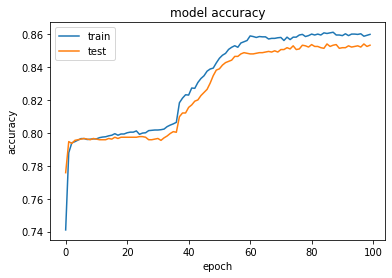

In [52]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

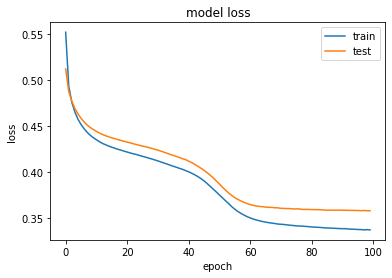

In [59]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [54]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)


In [58]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1536,   59],
       [ 214,  191]])

In [56]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)


In [57]:
score

0.8635